![](DIO_logo.png)

<div align="center"> <h3>Análise de Dados com Pandas</h3></div>

### 1. Importando as bibliotecas necessárias

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import matplotlib.colors as mcolors
plt.style.use('seaborn')

### 2. carregando os dados (planilhas do Excel)

In [2]:
caminho_arquivos = glob("./datasets/ds2/*xlsx")
lista_dataframes = [pd.read_excel(arquivo) for arquivo in caminho_arquivos]

### 3. Verificando o correto carregamento dos arquivos

In [3]:
if all([isinstance(item, pd.core.frame.DataFrame) for item in lista_dataframes]):
    print("Todos os arquivos foram carregados como dataframes")

Todos os arquivos foram carregados como dataframes


In [4]:
lista_shapes = [item.shape for item in lista_dataframes]
for i,j in enumerate(lista_shapes):
    print(f'o dataframe {i} tem shape = {j}')

o dataframe 0 tem shape = (240, 5)
o dataframe 1 tem shape = (142, 5)
o dataframe 2 tem shape = (240, 5)
o dataframe 3 tem shape = (130, 5)
o dataframe 4 tem shape = (142, 5)


In [5]:
lista_numero_colunas = [item[1] for item in lista_shapes]
if max(lista_numero_colunas) == min(lista_numero_colunas):
    print('Todos os dataframes possuem o mesmo número de colunas')
else:
    print('Os dataframes não possume o mesmo número de colunas!')

Todos os dataframes possuem o mesmo número de colunas


In [6]:
nomes_colunas_lista = [item.columns.values for item in lista_dataframes]

avaliacao_nomes_iguais = []
for i in range(len(nomes_colunas_lista) - 1):
    avaliacao_nomes_iguais.append(np.all(np.equal(nomes_colunas_lista[0], nomes_colunas_lista[i + 1])))

if all(avaliacao_nomes_iguais):
    print("Todos os dataframes possuem colunas de mesmo nome")

Todos os dataframes possuem colunas de mesmo nome


### 4. Uma vez verificado que os dataframes foram carregados e possuem as "mesmas colunas", podemos concatená-los em um único data frame.

In [7]:
df = pd.concat(lista_dataframes)

In [8]:
if df.shape[0] == sum([i[0] for i in lista_shapes]):
    print("A soma do número de linhas dos dataframes individuais corresponde\
    ao número total de linhas do novo dataframe (obtido a partir da concatenação dos demais)")

A soma do número de linhas dos dataframes individuais corresponde    ao número total de linhas do novo dataframe (obtido a partir da concatenação dos demais)


### 5. Uma visão geral do conjunto de dados

In [45]:
df

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.00,853,2
1,Natal,2018-11-25,563.00,853,2
2,Natal,2019-03-11,308.00,852,3
3,Natal,2019-01-07,271.00,854,3
4,Natal,2019-03-09,699.00,853,3
...,...,...,...,...,...
137,Fortaleza,2019-03-02,51.99,983,3
138,Fortaleza,2019-03-02,150.38,983,6
139,Fortaleza,2019-03-02,141.16,980,7
140,Fortaleza,2019-03-02,166.89,983,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 141
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Cidade  894 non-null    object        
 1   Data    894 non-null    datetime64[ns]
 2   Vendas  894 non-null    float64       
 3   LojaID  894 non-null    int64         
 4   Qtde    894 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.9+ KB


#### Verificando o número de linhas e colunas

In [11]:
print(f"O dataframe concatenado possui:\n\
    {df.shape[0]} linhas\n\
    {df.shape[1]} colunas" )

O dataframe concatenado possui:
    894 linhas
    5 colunas


#### Verificando os tipos de dados de cada colunas

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

#### Convertendo os dos dados da coluna LojaID de inteiros para categóricos

In [13]:
df['LojaID'] = df['LojaID'].astype(pd.CategoricalDtype())

In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID          category
Qtde               int64
dtype: object

#### Verificando a presença de dados faltantes

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

#### Quantas lojas temos ao todo? Em quantas cidades?

In [16]:
df[['Cidade', 'LojaID']].nunique()

Cidade     5
LojaID    19
dtype: int64

#### Qual o número de lojas por cidade?

In [18]:
df.groupby('Cidade')['LojaID'].nunique()

Cidade
Aracaju      4
Fortaleza    8
Natal        7
Recife       4
Salvador     4
Name: LojaID, dtype: int64

#### Total de vendas por ano

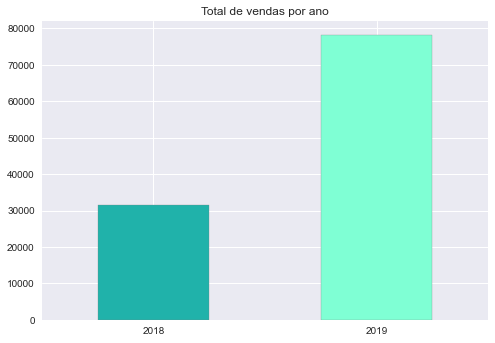

In [19]:
df.groupby(df['Data'].dt.year)['Vendas'].sum().plot.bar(title = "Total de vendas por ano",
                            color = ['lightseagreen', 'aquamarine'], edgecolor = 'grey');
plt.xticks(rotation = 'horizontal');
plt.xlabel('');

#### Comportamento das vendas ao longo dos meses (2018 e 2019)

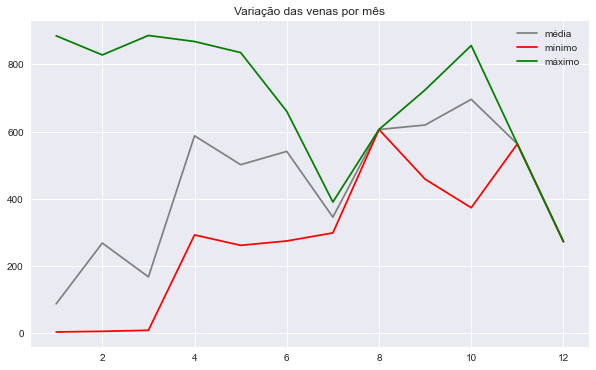

In [20]:
vendas_por_mes = df.groupby(df['Data'].dt.month)['Vendas']
plt.figure(figsize=(10,6))
vendas_por_mes.mean().plot(label = "média", color = 'grey');
vendas_por_mes.min().plot(label = "mínimo", color = 'red');
vendas_por_mes.max().plot(label = "máximo", color = 'green');
plt.title('Variação das venas por mês')
plt.xlabel('');
plt.legend();

#### Média de vendas por mês e por ano

In [21]:
vendas_mes_ano = df.groupby([df['Data'].dt.month, df['Data'].dt.year])['Vendas'].mean()

In [22]:
vendas_mes_ano.index.names = ['mês', 'ano']

In [24]:
vendas_2018 = vendas_mes_ano.reset_index().query('ano == 2018')
vendas_2019 = vendas_mes_ano.reset_index().query('ano == 2019')

In [26]:
vendas_mes_ano = vendas_2018.join(vendas_2019.set_index('mês'),
                                  on = ['mês'], how = 'outer',
                                  lsuffix= '_2018',
                                  rsuffix='_2019')

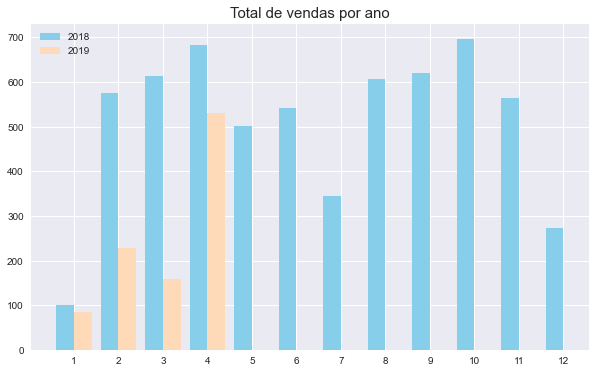

In [43]:
x = np.arange(len(vendas_mes_ano['mês'].unique()))
largura = 0.40
fig, ax = plt.subplots(figsize = (10,6));
ax.bar(x - largura/2, vendas_mes_ano['Vendas_2018'], largura, label = '2018', color = 'skyblue');
ax.bar(x + largura/2, vendas_mes_ano['Vendas_2019'], largura, label = '2019', color = 'peachpuff');
ax.set_title("Total de vendas por ano", fontsize = 15);
ax.set_xticks(x);
ax.set_xticklabels(vendas_mes_ano['mês']);
ax.legend();

#### Total de vendas por loja

Text(0, 0.5, 'ID de Loja')

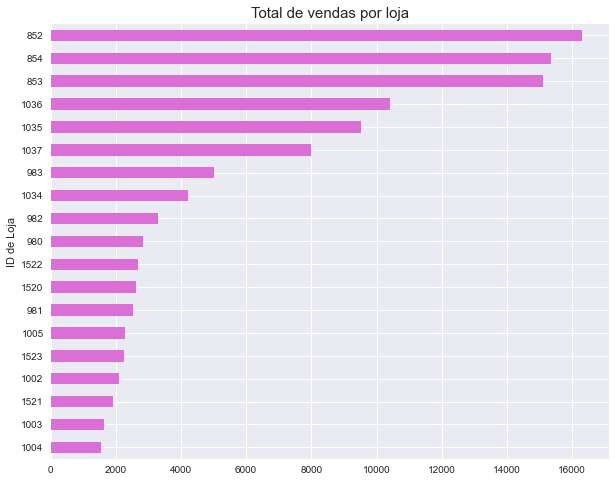

In [42]:
vendas_media_loja = (df.groupby('LojaID')['Vendas']
                     .sum()
                     .sort_values()
                     .plot.barh(figsize = (10,8), color = "orchid"));
plt.title('Total de vendas por loja', fontsize = 15);
plt.ylabel('ID de Loja')

#### Total de vendas por cidade

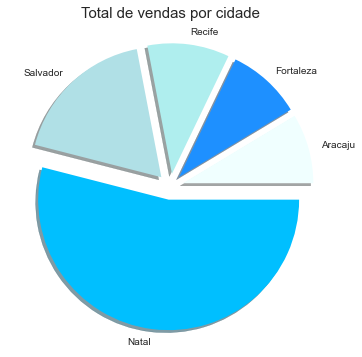

In [40]:
vendas_media_cidade = (df.groupby('Cidade')['Vendas']
                     .sum()
                     .sort_values()
                     )
plt.figure(figsize = (10,6))
plt.pie(vendas_media_cidade,
        labels = vendas_media_cidade.index,
        explode = [0.1, 0.1, 0.1, 0.1, 0.1],
        colors = ['azure', 'dodgerblue', 'paleturquoise', 'powderblue', 'deepskyblue'],
        shadow = True);
plt.title("Total de vendas por cidade", fontsize = 15);

In [51]:
def filtra_cidade(data_frame, cidade, eixo):
    tmp_df = data_frame[data_frame['Cidade'] == cidade].copy()
    tmp_df['Data'] = tmp_df['Data'].dt.month.copy()
    tmp_df = tmp_df.groupby('Data')['Vendas'].sum()
    tmp_df.plot(ax = eixo, label = cidade)

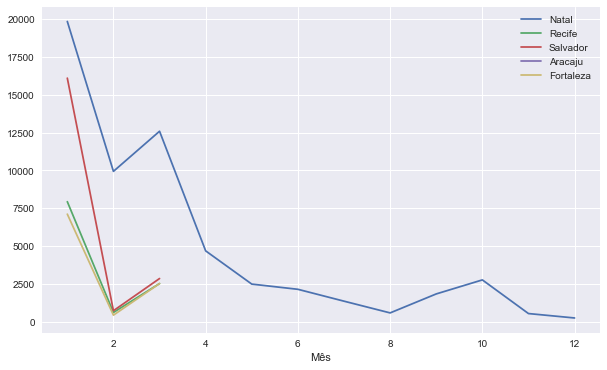

In [53]:
fig, ax = plt.subplots(figsize = (10,6))
for cidade in df['Cidade'].unique():
    filtra_cidade(df, cidade, ax);
ax.legend();
ax.set_xlabel('Mês');

#### Amplitude de variação das vendas por cidade

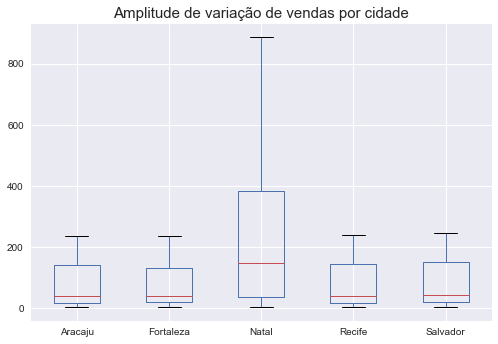

In [41]:
df[['Cidade', 'Vendas']].boxplot(by = 'Cidade');
plt.title('Amplitude de variação de vendas por cidade', fontsize = 15)
plt.suptitle('');
plt.xlabel('');